# Implementing linear regression with Python 
Let's now go ahead and try to make a simple linear regression model and see what are the issues that we face and how can they be resolved to make the model more robust. 

We will use the advertising data from the lab folder. 

The following two methods implement linear regression in Python: 
* The ols method and the statsmodel.formula.api library 
* The scikit-learn package 

Let's implement a simple linear regression using the first method and then build upon a multiple-linear regression model. 

We will then also look at how the second method is used to do the same.

## Linear regression using the statsmodel library 

Let's first import the Advertising data, as shown: 

In [1]:
import pandas as pd 

advert=pd.read_csv('Advertising.csv') 
advert.head() 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


This dataset contains data about the advertising budget spent on TV, Radio, and Newspapers, for a particular product and the resulting sales. We will expect a positive correlation between such advertising costs and sales. We already know that there is a good correlation between TV advertising costs and sales. 

Let's see whether it is present or not. If yes, how does the relationship look like and to do that we write the following code: 

In [2]:
import statsmodels.formula.api as smf 
model1=smf.ols(formula='Sales~TV',data=advert).fit() 
model1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In the notation that we have been using, a is the intercept and β is the slope. 

Thus: 
$$
\alpha = 7.03 and \beta = 0.047
$$
The equation for the model will be: 
$$
Sales = 7.032+0.0047*TV
$$

The equation implies that an increase of 100 units in advertising costs will increase the sale by four units. 
If you remember, we learnt that the values of these parameters are estimates and there will be a p-value associated to these. If the p-values are very small, then it can be accepted that these parameters have a non-zero value and are statistically significant in the model. Let's have a look at the p-values for these parameters: 

In [3]:
model1.pvalues 

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

As it can be seen, the p-values are very small; hence, the parameters are significant. Let's also check another important indicator of the model efficacy and that is R2. As we saw earlier, there is a ready-made method for doing this. This can be done by typing the following code line:

In [4]:
model1.rsquared 

0.611875050850071

The value comes out to be 0.61. 
If we want the entire important model parameters at one go, we can take a look at the model summary by writing this snippet: 

In [5]:
model1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        14:03:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see, the F-statistic for this model is very high and the associated p-value is negligible, suggesting that the parameter estimates for this model were all significant and non-zero. 

Let's now predict the values of sales based on the equation we just derived. This can be done using the following snippet: 

In [6]:
sales_pred=model1.predict(pd.DataFrame(advert['TV'])) 
sales_pred 

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
5       7.446162
6       9.765950
7      12.746498
8       7.441409
9      16.530414
10     10.174765
11     17.238710
12      8.163966
13     11.667416
14     16.734822
15     16.321253
16     10.255578
17     20.409404
18     10.322129
19     14.034741
20     17.414596
21     18.317792
22      7.660077
23     17.885209
24      9.994126
25     19.529976
26     13.825579
27     18.446141
28     18.859710
29     10.388680
         ...    
170     9.409426
171    14.852371
172     7.964312
173    15.037764
174    17.604742
175    20.195489
176    18.840695
177    15.123330
178    20.185982
179    14.904661
180    14.476831
181    17.419349
182     9.704153
183    20.704131
184    19.097393
185    16.777605
186    13.663955
187    16.116846
188    20.628073
189     7.921529
190     8.910291
191    10.621610
192     7.850224
193    14.961705
194    14.148829
195     8.848493
196    11.510545
197    15.4465

This equation basically calculates the predicted sales value for each row based on the model equation using TV costs. One can plot sales_pred against the TV advertising costs to find the line of best fit. Let's do that:

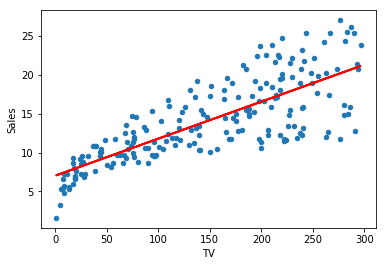

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline 
advert.plot(kind='scatter', x='TV', y='Sales') 
plt.plot(pd.DataFrame(advert['TV']),sales_pred,c='red',linewidth=2) 

We get the following plot as the output. The red line is the line of best fit (obtained from the model). The blue dots represent the actual data present: 

Now, let's calculate the RSE term for our prediction using the following code snippet: 

In [10]:
import numpy as np
advert['sales_pred']=0.047537*advert['TV']+7.03 
advert['RSE']=(advert['Sales']-advert['sales_pred'])**2 
RSEd=advert.sum()['RSE'] 
RSE=np.sqrt(RSEd/198) 
salesmean=np.mean(advert['Sales']) 
error=RSE/salesmean 
RSE,salesmean,error 

(3.258657369247128, 14.022500000000003, 0.23238776033140504)

The output consists of three numbers, first of which is RSE=3.25, second is salesmean (mean of actual sales) = 14.02 and error is their ratio, which is equal to 0.23. Thus, on an average this model will have 23%, even if the coefficients are correctly predicted. This is a significant amount of errors and we would like to bring it down by some means. Also, the R2 value of 0.61 can be improved upon. One thing we can try is to add more columns in the model, as predictors and see whether it improves the result or not. 

## Multiple linear regression 
When linear regression involves more than one predictor variable, then it is called multiple linear regression. The nature of the model remains the same (linear), except that there might be separate slope (β) coefficients associated with each of the predictor variables. The model will be represented, as follows:
$$ 
y model = \alpha  + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 ......+\beta_n X_n
$$

Each βi will be estimated using the same least sum of squares method; hence, would have a p-value associated with the estimation. The smaller the p-value associated with a variable, the more the significance of that variable to the model. The variables with large p-values should be eliminated from the model as they aren't good predictors of the output variable. 

While the multiple regression gives us with the possibility of using more variables as predictors; hence, it increases the efficiency of the model. It also increases the complexity of the process of model building, as the selection of the variables to be kept and discarded in the model becomes tedious.

With this simple dataset of three predictor variables, there can be seven possible models. 

They are as follows: 
* Model 1: Sales~TV 
* Model 2: Sales~Newspaper 
* Model 3: Sales~Radio 
* Model 4: Sales~TV+Radio 
* Model 5: Sales~TV+Newspaper 
* Model 6: Sales~Newspaper+Radio 
* Model 7: Sales~TV+Radio+Newspaper 

For a model with p possible predictor variables, there can be 2p-1 possible models; hence, as the number of predictors increases, the selection becomes tedious. 

It would have been a tedious task to choose from so many possible models. Thankfully, there are a few guidelines to filter some of these and then navigate towards the most efficient one. 
The following are the guidelines: 
* Keep the variables with low p-values and eliminate the ones with high p-values 
* Inclusion of a variable to the model should ideally increase the value of R2 (although it is not a very reliable indicator of the same and looking at the adjusted R2 is preferred. The concept of adjusted R2 and why it is a better indicator than R2 will be explained later).

Based on these guidelines, there are two kinds of approaches to select the predictor variables to go in the final model: 

* Forward selection: In this approach, we start with a null model without any predictor and then start adding predictor variables one by one. The variable whose addition results into a model with the lowest residual sum of squares will be added first to the model. If the p-value for the variable is small enough and the value of the adjusted R2 goes up; the predictor variable is included in the model. Otherwise, it is not included in the model. 
* Backward selection: In this approach, one starts with a model that has all the possible predictor variables in the model and discards some of them. If the p-value of a predictor variable is large and the value of the adjusted R2 goes up, the predictor variable is discarded from the model. Otherwise, it remains a part of the model. 

Many of the statistical programs, including the Python, give us an option to select from the two preceding approaches while implementing a linear regression. The statistical program then implements the linear regression using the selected approach. 

For now, let us manually add a few variables and see how it changes the model parameters and efficacy, so that we can get a better glimpse of what goes on behind the curtain when these approaches are implemented by the statistical program. 

We have already seen one model assuming a linear relationship between sales and TV advertising costs. We can ignore the other models consisting of single variables (that is newspaper and radio, as they have a small correlation compared to TV). Let us now try to add more variables to the model we already have and see how the parameters and efficacy change. 

Let us try adding the newspaper variable to the model using the following code snippet: 

In [11]:
import statsmodels.formula.api as smf 
model2=smf.ols(formula='Sales~TV+Newspaper',data=advert).fit() 
model2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

The p-values for the coefficients are very small, suggesting that all the estimates are significant. The equation for this model will be: 

$$
Sales = 5.77 +0.046*TV+0.04*Newspaper
$$

The values of $R^2$ and adjusted $R^2$ are 0.646 and 0.642, which is just a minor improvement from the value obtained in the earlier model. 
The values can be predicted using the following snippet: 

In [12]:
sales_pred=model2.predict(advert[['TV','Newspaper']]) 
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
5       9.499445
6       9.510924
7      11.925419
8       6.222518
9      16.083262
10      9.945228
11     16.021516
12      9.805257
13     10.666196
14     17.381579
15     17.278653
16     13.995865
17     21.440393
18      9.829727
19     13.528088
20     18.379490
21     17.948453
22      8.587327
23     17.641044
24      9.506109
25     18.967556
26     13.034296
27     18.048554
28     18.456595
29     10.890326
         ...    
170     8.933646
171    15.586198
172     7.445942
173    14.239121
174    16.785052
175    20.610266
176    18.322864
177    15.314058
178    19.800514
179    14.320051
180    13.486699
181    17.234475
182     9.724113
183    22.438692
184    19.005059
185    16.256398
186    13.493904
187    15.542563
188    19.352307
189     7.686735
190     7.884019
191     9.581306
192     7.978983
193    13.757260
194    13.061376
195     8.176802
196    10.551220
197    14.3594

To calculate the RSE, we modify the snippet a little

In [13]:
import numpy as np 
advert['sales_pred']=5.77 + 0.046*advert['TV'] + 0.04*advert['Newspaper'] 
advert['RSE']=(advert['Sales']-advert['sales_pred'])**2 
RSEd=advert.sum()['RSE'] 
RSE=np.sqrt(RSEd/197) 
salesmean=np.mean(advert['Sales']) 
error=RSE/salesmean 
RSE,salesmean,error 

(3.1346969895743846, 14.022500000000003, 0.22354765481008265)

The value of RSE comes out to be 3.12 (22%), not very different from the model with only TV. The number 197 comes from the (n-p-1) term in the formula for RSE, where n=200, p=2 for the current model. The following table is the model summary: 

In [14]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           3.95e-45
Time:                        14:05:21   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Although as the F-statistic decreases, the associated p-value also decreases. But, it is just a marginal improvement to the model, as we can see in the adj. R2 value. So, adding newspaper didn't improve the model significantly. 

Let's try adding radio to the model instead of the newspaper. Radio had the second best correlation with the Sales variable in the correlation matrix we created earlier in the chapter. Thus, one expects some significant improvement in the model upon its addition to the model. Let's see if that happens or not: 

In [15]:
import statsmodels.formula.api as smf 
model3=smf.ols(formula='Sales~TV+Radio',data=advert).fit() 
model3.params 

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

The model can be represented as the following: 
$$ 
Sales = 2.92 + 0.045 * TV + 0.18 * Radio
$$
The values can be predicted based on the preceding model using the following snippet: 

In [16]:
sales_pred=model3.predict(advert[['TV','Radio']]) 
sales_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
5      12.512084
6      11.718212
7      12.105516
8       3.709379
9      12.551697
10      7.035860
11     17.256520
12     10.608662
13      8.810951
14     18.444668
15     20.828915
16     12.903865
17     23.241076
18      9.941215
19     14.153846
20     18.121392
21     14.742064
22      6.514172
23     16.544027
24      8.140352
25     15.608021
26     14.967694
27     17.046335
28     19.399541
29      9.159297
         ...    
170     7.389574
171    14.376846
172     7.596578
173    11.960970
174    13.736151
175    24.783526
176    19.964022
177    12.174924
178    16.013844
179    12.378040
180    10.575089
181    13.933696
182     6.564088
183    24.163936
184    18.537949
185    20.779377
186     9.698684
187    17.060279
188    18.620097
189     6.051445
190    12.454978
191     8.405926
192     4.478859
193    18.448761
194    16.463190
195     5.364512
196     8.152375
197    12.7680

The model summary looks like: 

In [20]:
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           4.83e-98
Time:                        14:08:45   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

One thing to observe here is that the R2 value has improved considerably due to the addition of radio to the model. Also, the F-statistic has increased significantly from the last model indicating a very efficient model. 

The RSE can be calculated using the same method described previously. The value for this model comes out to be 1.71 (around 12%),which is much better than the 23% and 22% in the previous model. 

Thus, we can conclude that radio is a great addition to the model and TV and radio advertising costs have been able to describe the sales very well and this model itself is a very efficient model. But, can we improve it a bit further by combining all three predictor variables? 

The last thing that we should try is, all the predictor variables together by using the following code: The estimates of the coefficients and the associated p-values for this model are shown: 

In [18]:
import statsmodels.formula.api as smf 
model4=smf.ols(formula='Sales~TV+Radio+Newspaper',data=advert).fit() 
model4.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

The p-values for the coefficients are very small, suggesting that all the estimates are significant. The equation for this model will be: 
$$
Sales = 2.93 + 0.045 * TV + 0.18 * Radio - 0.01 * Newpaper
$$
 
The values of sales can be predicted using the following snippet: 

In [19]:
sales_pred=model4.predict(advert[['TV','Radio','Newspaper']]) 
sales_pred

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
5      12.478348
6      11.729760
7      12.122953
8       3.727341
9      12.550849
10      7.032299
11     17.285129
12     10.577121
13      8.826300
14     18.434366
15     20.819300
16     12.823657
17     23.224957
18      9.951682
19     14.166073
20     18.100767
21     14.740538
22      6.489150
23     16.545933
24      8.146519
25     15.610039
26     14.989514
27     17.051673
28     19.410538
29      9.144024
         ...    
170     7.394980
171    14.358274
172     7.607692
173    11.970939
174    13.744357
175    24.786870
176    19.979373
177    12.162046
178    16.010997
179    12.384555
180    10.587200
181    13.928099
182     6.554670
183    24.133100
184    18.538521
185    20.803011
186     9.691373
187    17.076442
188    18.644306
189     6.051624
190    12.489159
191     8.424019
192     4.466230
193    18.486958
194    16.495300
195     5.370342
196     8.165312
197    12.7859

The summary of the model is shown in the following table: 

In [21]:
model4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        14:08:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The most striking feature of this model is that the estimate of the coefficients is very similar to that in the previous model. The intercept, coefficient for TV, and the coefficient for Radio are more or less the same. The values of R2 and adj-R2 are also similar to the previous model. 

The value of RSE can be calculated in a similar way, as before. The value comes out to 2.57 (18%), which is more than the previous model. 

Other things to note about this model are the following: 

* There is a small negative coefficient for the newspaper. When we considered only TV and newspaper in the model, the coefficient of the newspaper was significantly positive. Something affected the coefficient of the newspaper when it became a part of the model in presence of TV and radio. 
* For this model, the F-statistic has decreased considerably to 570.3 from 859.6 in the previous model. This suggests that the partial benefit of adding newspaper to the model containing TV and radio is negative. 
* The value of RSE increases on addition of newspaper to the model. 

All these point in the direction that the model actually became a little less efficient on addition of newspaper to the previous model. What is the reason? Multi-collinearity is the reason for the sub-optimal performance of the model when newspaper was added to the final model. Multi-collinearity alludes to the correlation between the predictor variables of the model. Go back to the correlation matrix that we created for this dataset and you will find that there is a significant correlation of 0.35 between radio and newspaper. This means that the expense on Newspaper is related to that on the Radio. This relationship between the predictor variable increases the variability of the co-efficient estimates of the related predictor variables

# Model validation 
Any predictive model needs to be validated to see how it is performing on different sets of data, whether the accuracy of the model is constant over all the sources of similar data or not. This checks the problem of over-fitting, wherein the model fits very well on one set of data but doesn't fit that well on another dataset. One common method is to validate a model traintest split of the dataset. Another method is k-fold cross validation, about which we will learn more in the later chapter. 

## Training and testing data split 
Ideally, this step should be done right at the onset of the modelling process so that there are no sampling biases in the model; in other words, the model should perform well even for a dataset that has the same predictor variables, but their means and variances are very different from what the model has been built upon. This can happen because the dataset on which the model is built (training) and the one on which it is applied (testing) can come from different sources. 

A more robust way to do this is a process called the k-fold cross validation.

Let's see how we can split the available dataset in the training and testing dataset and apply the model to the testing dataset to get other results: 

In [23]:
import numpy as np 
a=np.random.randn(len(advert)) 
check=a<0.8 
training=advert[check] 
testing=advert[~check] 

NOTE: 
The above sampling technique is naïve and doesn’t consider sampling etc. You might remember from previous labs that Scikitlearn has a very helpful function train_test_split which automates the process of selecting a training and testing set.

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html   
 
The ratio of split between training and testing datasets is 80:20; in other words, 160 rows of the advert dataset will be in training and 40 rows in testing. 
Let's create a model on training the data and test the model performance on the testing data. Let us create the only model that works best (we have found it already), the one with TV and radio variables, as predictor variables: 

In [24]:
import statsmodels.formula.api as smf 
model5=smf.ols(formula='Sales~TV+Radio',data=training).fit() 
model5.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     684.9
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           3.75e-76
Time:                        14:12:45   Log-Likelihood:                -295.00
No. Observations:                 153   AIC:                             596.0
Df Residuals:                     150   BIC:                             605.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9233      0.327      8.928      0.000       2.276       3.570
TV             0.0444      0.002     28.391      0.000       0.041       0.048
Radio          0.1977      0.009     20.919      0.000       0.179       0.216
==============================================================================
Omnibus:                       60.936   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.604
Skew:                          -1.496   Prob(JB):                     9.23e-48
Kurtosis:                       8.003   Cond. No.                         416.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Most of the model parameters, such as intercept, coefficient estimates, and R2 are very similar. The difference in F-statistics can be attributed to a smaller dataset. The smaller the dataset, the larger the value of SSD and the smaller the value of the (n-p-1) term in F-statistic formula; both contribute towards the decrease in the F-statistic value. 

The model can be written, as follows: 
$$
Sales ~ 2.86 + 0.04 * TV + 0.17 * Radio
$$
Let us now predict the sales values for the testing dataset: 

In [25]:
sales_pred=model5.predict(training[['TV','Radio']]) 
sales_pred

0      20.621982
3      17.820886
4      13.093285
6      11.963060
7      12.139905
8       3.720667
9      12.316553
10      7.007473
11     17.209400
12     10.920112
13      8.758759
14     18.497819
18     10.051361
20     18.105303
22      6.653290
23     16.410154
24      8.182928
25     15.298680
27     16.895014
29      9.223949
30     21.534744
31     11.380559
32      7.539485
33     18.680644
34      7.453054
35     16.652745
36     23.443567
37     16.009182
38     10.117174
39     20.508887
         ...    
164    11.037876
165    14.016798
166    11.152151
167    13.141645
168    17.161430
169    17.653346
170     7.438613
172     7.768030
174    13.479067
175    24.896220
176    19.932759
177    12.029128
178    15.674725
180    10.396720
181    13.701139
182     6.547742
183    24.205331
184    18.413249
185    20.949700
189     6.146471
190    12.804002
191     8.413692
192     4.498246
193    18.639214
194    16.614029
195     5.352420
196     8.078327
197    12.6278

The value of RSE for this prediction on the testing dataset can be calculated using the following snippet: 

In [27]:
import numpy as np 
testing['sales_pred']=2.86 + 0.04*testing['TV'] + 0.17*testing['Radio'] 
testing['RSE']=(testing['Sales']-testing['sales_pred'])**2 
RSEd=testing.sum()['RSE'] 
RSE=np.sqrt(RSEd/51) 
salesmean=np.mean(testing['Sales']) 
error=RSE/salesmean 
RSE,salesmean,error

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(2.098512096607461, 14.404255319148932, 0.14568695500819898)

The value of RSE comes out to be 2.54 over a sales mean (in the testing data) of 14.80 amounting to an error of 17%.

We can see that the model doesn't generalize very well on the testing dataset, as the RSE for the same model is different in the two cases. It implies some degree of over fitting when we tried to build the model based on the entire dataset. The RSE with the training-testing split, albeit a bit more, is more reliable and replicable. 

## Summary of models 
We have tried four models previously. Let us summarize the major results from each of the models, at one place:

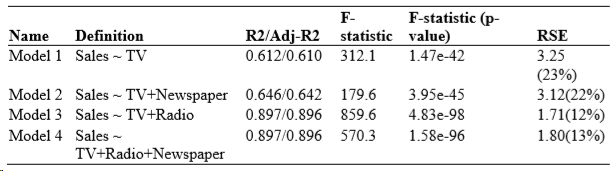

To summarize, for a good linear model, the predictor variables should be chosen based on the following criteria: 
* $R^2$: $R^2$ will always increase when you add a new predictor variable to the model. However, it is not a very reliable check of the increased efficiency of the model. Rather, for an efficient model, we should check the **adjusted-$R^2$**. This should increase on adding a new predictor variable. 
* **p-values:** The lower the p-value for the estimate of the predictor variable, the better it is to add the predictor variable to the model. 
* **F-statistic:** The value of the F-statistic for the model should increase after the addition of a new predictor variable for a predictor variable to be an efficient addition to the model. The increase in the F-statistic is a proxy to the improvement in the model brought upon solely by the addition of that particular variable. Alternatively, the p-value associated with the F-statistic should decrease on the addition of a new predictor variable. • RSE: The value of RSE for the new model should decrease on the addition of the new predictor variable. 
* **VIF:** To take care of the issues arising due to multi-collinearity one needs to eliminate the variables with large values of VIF. 



# Linear regression with scikit-learn 
Let's now re-implement the linear regression model using the scikit-learn package. This method is more elegant as it has more in-built methods to perform the regular processes associated with regression. 

For example, you might remember from the last lab that there is a separate method for splitting the dataset into training and testing datasets: 

In [29]:
from sklearn.linear_model import LinearRegression 
from sklearn.cross_validation import train_test_split 

feature_cols = ['TV', 'Radio'] 
X = advert[feature_cols] 
Y = advert['Sales'] 
trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2) 

lm = LinearRegression() 
lm.fit(trainX, trainY)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We split the advert dataset into train and test dataset and built the model on TV and radio variables from the test dataset. The following are the parameters of the model: 

In [37]:
print (lm.intercept_ )
print (lm.coef_ )


2.827652394729819
[0.04501418 0.19464318]
Solving environment: | ^C
failed

CondaError: KeyboardInterrupt



The result is as follows: 

(Note: your resulst may be slightly different depending on how the data has been sampled)
$$
Intercept – 2.8, TV coefficient – 0.04, Radio coefficient – 0.19 
$$
A better way to look at the coefficients is to use the zip method to write the variable name and coefficient together. The required snippet and the output are mentioned in the following code: 

In [34]:
zip(feature_cols, lm.coef_) 
[('TV', 0.045706061219705982), ('Radio', 0.18667738715568111)] 

[('TV', 0.04570606121970598), ('Radio', 0.1866773871556811)]

The value of $R^2$ is calculated by typing the following code: 

In [ ]:
lm.score(trainX, trainY) 

The value comes out to be around 0.89, very close to the value obtained by the method used earlier. 

The model can be used to predict the value of sales using TV and radio variables from the test dataset, as follows: 

In [35]:
lm.predict(testX)

array([19.44538199,  3.49519546, 12.69573311, 19.24231623,  7.62225826,
       20.8339672 , 11.46370881,  9.44062744, 21.43543249, 12.48026043,
       15.5214624 , 11.61492194,  9.93281899, 17.68606434, 18.26591607,
       20.80783707, 17.16363371, 12.60554723, 10.55360711, 14.94937555,
       11.29654493, 14.40459359, 12.22843284,  9.54805007, 19.14778645,
       13.14872992, 23.23540353, 13.65359363, 19.3020112 , 10.96456933,
       23.36730898,  6.46691558, 10.56703217, 15.10582698,  6.4224505 ,
       19.56017617, 14.96322423, 12.6053443 ,  9.76195376,  8.95983806])

## Feature selection with scikit-learn 
As stated before, many of the statistical tools and packages have in-built methods to conduct a variable selection process (forward selection and backward selection). If it is done manually, it will consume a lot of time and selecting the most important variables will be a tedious task compromising the efficiency of the model. 

One advantage of using the scikit-learn package for regression in Python is that it has this particular method for feature selection. This works more or less like backward selection (not exactly) and is called Recursive Feature Elimination (RFE). One can specify the number of variables they want in the final model. 

The model is first run with all the variables and certain weights are assigned to all the variables. In the subsequent iterations, the variables with the smallest weights are pruned from the list of variables till the desired number of variables is left. 

Let us see how one can do a feature selection in scikit-learn: 

In [38]:
from sklearn.feature_selection import RFE 
from sklearn.svm import SVR 
feature_cols = ['TV', 'Radio','Newspaper'] 
X = advert[feature_cols] 
Y = advert['Sales'] 
estimator = SVR(kernel="linear") 
selector = RFE(estimator,2,step=1) 
selector = selector.fit(X, Y)

We use the methods named RFE and SVR in-built in scikit-learn. We indicate that we want to estimate a linear model and the number of desired variables in the model to be two. 
To get the list of selected variables, one can write the following code snippet: 

In [39]:
selector.support_ 

array([ True,  True, False])

It results in an array mentioning whether the variables in $X$ have been selected for the model or not. **True** means that the variable has been selected, while **False** means otherwise. In this case, the result is as follows:

### Result of feature selection process 
In our case, $X$ consists of three variables: TV, radio, and newspaper. 

The preceding array suggests that TV and radio have been selected for the model, while the newspaper hasn't been selected. This concurs with the variable selection we had done manually. 

This method also returns a ranking, as described in the following example: 


In [40]:
selector.ranking_  

array([1, 1, 2])

All the selected variables will have a ranking of 1 while the subsequent ones will be ranked in descending order of their significance. A variable with rank 2 will be more significant to the model than the one with a rank of 3 and so on. 
 